In [1]:
import sys
#sys.path.append('/home/nicolol/workspace/QuICCPython/')
from matplotlib import pyplot as plt
import numpy as np
import quicc_bind

# 1) Opening files and loading data

In [2]:
from QuICCPython import read
#filename= '/home/nicolol/LocalRuns/CouetteImplicit/state0000.hdf5'
filename_spectral = '../HDF5Repository/stateSpectralShellQuICC.hdf5'
filename_physical = '../HDF5Repository/statePhysicalShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
myPhysicalData = read.PhysicalState(filename_physical, 'shell')

print('The spectral resolution is ({},{},{})'
      .format(mySpectralData.specRes.N,mySpectralData.specRes.L, mySpectralData.specRes.M))
print('The lengths of the various grids are  ({},{},{})'.
      format(len(myPhysicalData.grid_r),len(myPhysicalData.grid_theta), len(myPhysicalData.grid_phi)))

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


The spectral resolution is (120,240,20)
The lengths of the various grids are  (192,362,61)


# 2) spectral data to meridional slice

In [3]:
from QuICCPython.shell.spectral import getMeridionalSlice
SpectralFieldMeridional = getMeridionalSlice(mySpectralData, field = 'vorticity')
# change naming convention of instantiated variable to lower case
# change the shape of SpectralFieldMeridional u fields so that there is no transpose

In [4]:
SpectralFieldMeridional.keys()

dict_keys(['x', 'y', 'uR', 'uTheta', 'uPhi'])

In [5]:
from scipy.io import savemat
savemat('myfile.mat', mdict=dictionary)

NameError: name 'dictionary' is not defined

<IPython.core.display.Javascript object>


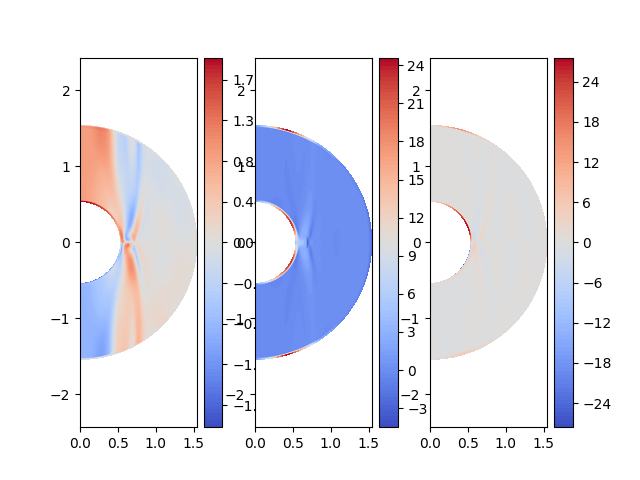

(0.0035920562838234094,
 1.5384302011581756,
 -1.538410575439513,
 1.538410575439513)

In [6]:
# Plot the meridional slices from getMeridionalSlice
from matplotlib import pyplot as plt
%matplotlib notebook
X = SpectralFieldMeridional['x']
Y = SpectralFieldMeridional['y']
Ur, Utheta, Uphi = SpectralFieldMeridional['uR'], SpectralFieldMeridional['uTheta'], SpectralFieldMeridional['uPhi']
plt.figure(1)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta.T , 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi.T , 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 3) physical data to meridional slice

In [7]:
from QuICCPython.shell.physical import getMeridionalSlice
PhysicalFieldMeridional = getMeridionalSlice(myPhysicalData, field = 'velocity_curl')
# here fields should be 'velocity', 'vorticity', 'magnetic', 'current', 'temp...'

<IPython.core.display.Javascript object>


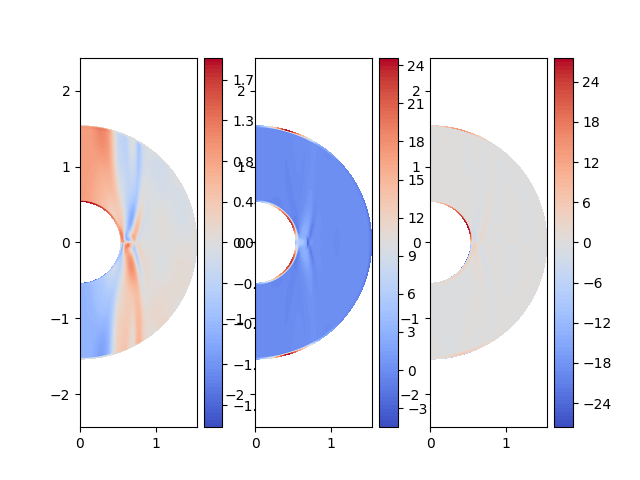

(0.0, 1.5384302011581754, -1.5384448054202389, 1.5384448054202389)

In [8]:
# Plot the meridional slices from getMeridionalSlice
%matplotlib notebook
X, Y = PhysicalFieldMeridional['x'], PhysicalFieldMeridional['y']
Ur, Utheta, Uphi = PhysicalFieldMeridional['uR'], PhysicalFieldMeridional['uTheta'], PhysicalFieldMeridional['uPhi']
plt.figure(2)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta.T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi.T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 4) spectral data to equatorial slice

In [9]:
from QuICCPython.shell.spectral import getEquatorialSlice
SpectralFieldEquatorial = getEquatorialSlice(mySpectralData)

In [10]:
# Plot the equatorial slices from getEquatorialSlice
from matplotlib import pyplot as plt
%matplotlib notebook
X, Y = SpectralFieldEquatorial['x'], SpectralFieldEquatorial['y']
Ur, Utheta, Uphi = SpectralFieldEquatorial['U_r'], SpectralFieldEquatorial['U_theta'], SpectralFieldEquatorial['U_phi']
plt.figure(4)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta.T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi.T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')


KeyError: 'U_r'

# 5) physical data to equatorial slice

In [11]:
from QuICCPython.shell.physical import getEquatorialSlice
PhysicalFieldEquatorial = getEquatorialSlice(myPhysicalData)

In [12]:
# Plot the equatorial slice from getEquatorialSlice
X, Y = PhysicalFieldEquatorial['x'],PhysicalFieldEquatorial['y']
Ur, Uth, Uphi = PhysicalFieldEquatorial['U_r'], PhysicalFieldEquatorial['U_theta'], PhysicalFieldEquatorial['U_phi']
plt.figure(5)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Uth.T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi.T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

KeyError: 'U_r'

# 6) spectral data to IsoRadius surface

In [24]:
from QuICCPython.shell.spectral import getIsoradiusSlice
SpectralFieldIsoradius = getIsoradiusSlice(mySpectralData, field='velocity')

In [14]:
# Plot the isosurface at r=.5 from getIsoradiusSlice
%matplotlib notebook
Y, X = SpectralFieldIsoradius['theta'], SpectralFieldIsoradius['phi']
Ur, Uth, Uphi = SpectralFieldIsoradius['U_r'], SpectralFieldIsoradius['U_theta'], SpectralFieldIsoradius['U_phi']
plt.figure(5)
plt.subplot(311)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(312)
f2 = plt.contourf(X, Y, Uth.T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(313)
f3 = plt.contourf(X, Y, Uphi.T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

KeyError: 'U_r'

# 7) physical data to to IsoRadius surface

In [25]:
from QuICCPython.shell.physical import getIsoradiusSlice
PhysicalFieldIsoradius = getIsoradiusSlice(myPhysicalData, field = 'velocity')

In [15]:
# Plot the isosurface at r=.5 from getIsoradiusSlice
%matplotlib notebook
Y, X = PhysicalFieldIsoradius['theta'], PhysicalFieldIsoradius['phi']
Ur, Uth, Uphi = PhysicalFieldIsoradius['U_r'], PhysicalFieldIsoradius['U_theta'], PhysicalFieldIsoradius['U_phi']
# TODO: change the dictionaries to uR, uTheta, uPhi vortR, vortTheta, vortPhi
plt.figure(5)
plt.subplot(311)
f1 = plt.contourf(X, Y, Ur.T, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(312)
f2 = plt.contourf(X, Y, Uth.T, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(313)
f3 = plt.contourf(X, Y, Uphi.T, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

NameError: name 'PhysicalFieldIsoradius' is not defined

# 8) $\mathbf{\omega}_f$ calculator

In [27]:
from QuICCPython.shell.spectral import computeUniformVorticity
omega_f = computeUniformVorticity(mySpectralData)
# TODO: change syntax rmin rmax
omega_f2 = computeUniformVorticity(mySpectralData, rmin = -1., rmax = .6)


With default cutoff of $\delta = 10 * E ^{1/2}$, $\omega_f$ is: {{omega_f[0]}} \\ {{omega_f[1]}} \\ {{omega_f[2]}} 

On a very narrow shell in the middle, $\omega_f$ is: {{omega_f2[0]}} \\ {{omega_f2[1]}} \\ {{omega_f2[2]}} 

# 9) Rotate the state in direction of the flow


In [2]:
from QuICCPython.shell.spectral import alignAlongFluid

# the 3 Eulerian rotations are no longer done inplace

# TODO: change the syntax: it should return 
rotatedSpectralState = alignAlongFluidAxis(mySpectralData, omega_f)
# change name to alignAlongFluidAxis

ModuleNotFoundError: No module named 'QuICCPython.shell.quicc_tools'

# 10) Compute Geostrophic flow

In [3]:
%%timeit

from QuICCPython.shell.spectral import  computeZIntegral

#computeZIntegral(mySpectralData, Integrator((40,40,80,40)))
# TODO: Integr
# integrator: should be able to specify the field wanted
# computeZIntegral(mySpectralData, field, nNs, integrator = 'filename',  Lmax  =L, Mmax = M, Nmax = N))
nNs = 80 # resolution in cylindrical radial coordinates
GeoSpecUS = computeZIntegral(mySpectralData, 'uS', nNs, Lmax  =80, Mmax = 40, Nmax = 40)
GeoSpecUPhi = computeZIntegral(mySpectralData, 'uPhi', nNs, Lmax  =80, Mmax = 40, Nmax = 40)
GeoSpecVortZ = computeZIntegral(mySpectralData, 'vortZ', nNs, Lmax  =80, Mmax = 40, Nmax = 40)
GeoSpecUZ = computeZIntegral(mySpectralData, 'uZ', nNs, Lmax  =80, Mmax = 40, Nmax = 40)

# change the various Lmax to maxL

ModuleNotFoundError: No module named 'QuICCPython.shell.quicc_tools'

<IPython.core.display.Javascript object>


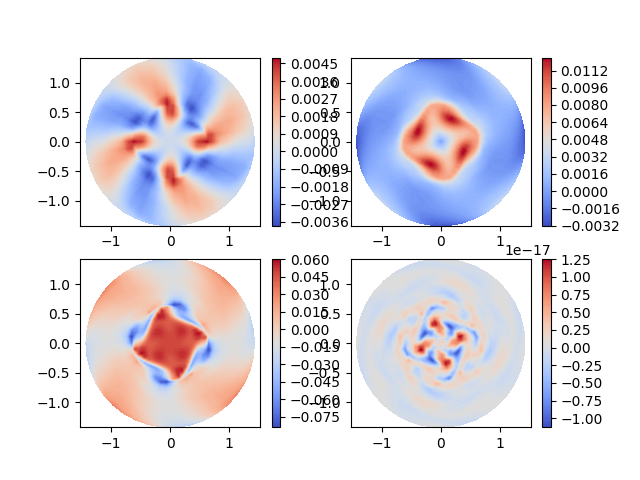

(-1.4294711538461535,
 1.4294711538461535,
 -1.4245887851234282,
 1.4245887851234282)

In [6]:
# plot the geostrophic flow components
from QuICCPython.shell.visualization_tools import computeRealFields
# visualization_tools gets merged with spectral

# getGeostrophicPhysical not computeRealFields
GeoPhysUS = computeRealFields(GeoSpecUS)
GeoPhysUPhi = computeRealFields(GeoSpecUPhi)
GeoPhysVortZ= computeRealFields(GeoSpecVortZ)
GeoPhysUZ = computeRealFields(GeoSpecUZ)
%matplotlib notebook
plt.subplot(221)
f1 = plt.contourf(GeoPhysUS['x'], GeoPhysUS['y'], GeoPhysUS['uS'], 100, cmap = 'coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(222)
f2 = plt.contourf(GeoPhysUPhi['x'], GeoPhysUPhi['y'], GeoPhysUPhi['uPhi'], 100, cmap = 'coolwarm')
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(223)
f3 = plt.contourf(GeoPhysVortZ['x'], GeoPhysVortZ['y'], GeoPhysVortZ['vortZ'], 100, cmap = 'coolwarm')
plt.colorbar(f3)
plt.axis('equal')
plt.subplot(224)
f3 = plt.contourf(GeoPhysUZ['x'], GeoPhysUZ['y'], GeoPhysUZ['uZ'], 100, cmap = 'coolwarm')
plt.colorbar(f3)
plt.axis('equal')


# 11) compute energy and dissipation


In [14]:
from QuICCPython.shell.spectral import computeEnergy
from QuICCPython import read
import numpy as np

filename_spectral = '../HDF5Repository/stateSpectralShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
Etot = np.array(computeEnergy(mySpectralData))

# compute energy densities for separate shells
E1 = np.array(computeEnergy(mySpectralData, rmin = .0, rmax = .5))
E2 = np.array(computeEnergy(mySpectralData, rmin = .5, rmax = 1.))

# compute the 3 volumes
vtot = 1/.65**3 - (.35/.65)**3
v1 = (.35/.65+.5)**3 - (.35/.65)**3
v2 = (1/.65)**3 - (.35/.65+.5)**3

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


The total kinetic energy integrater over the entire volume is {{Etot}}

The kinetic energy density of the inner half shell is {{E1}}

The kinetic energy density of the outer half shell is {{E2}}

Averaging one obtains: {{ (E1 * v1 + E2 * v2) / vtot }}

In [15]:
# to compute the dissipation we also can use computeEnergy, with the non default field 'vorticity'
Disstot = np.array(computeEnergy(mySpectralData, field = 'vorticity'))


In [19]:
from QuICCPython.shell.spectral import computeEnergyAverage
from QuICCPython import read
import numpy as np
from numpy.polynomial.chebyshev import chebgauss

filename_spectral = '../HDF5Repository/stateSpectralShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
Etot = computeEnergyAverage(mySpectralData, field = 'vorticity')

nr = len(Etot[0])
x,w = chebgauss(nr)
r = x*.5 + .5 


/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


<IPython.core.display.Javascript object>


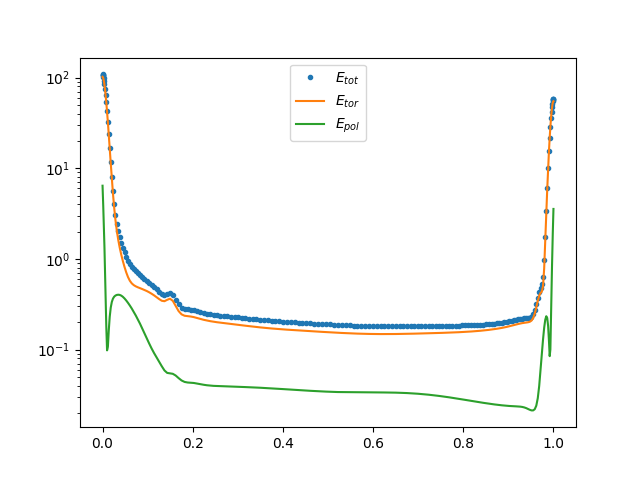

In [20]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.semilogy(r, Etot[0], label = r'$E_{tot}$')
plt.semilogy(r, Etot[1], label = r'$E_{tor}$')
plt.semilogy(r, Etot[2], label = r'$E_{pol}$')
plt.legend()

The total kinetic dissipation integrater over the entire volume is {{Disstot}}

For the benchmark with stateX.hdf5, Philippe reports $E_{tor} = E_{tot} =$ 0.49198018906783 

We obtain here $E_{tor} = E_{tot} =$ {{Etot[1]*2}}

The real value is {{u_2/2/volume}}

### Benchmarks

(360,)
(362,)
2.610241257998695e-13
3.7208567639787474e-14


<IPython.core.display.Javascript object>


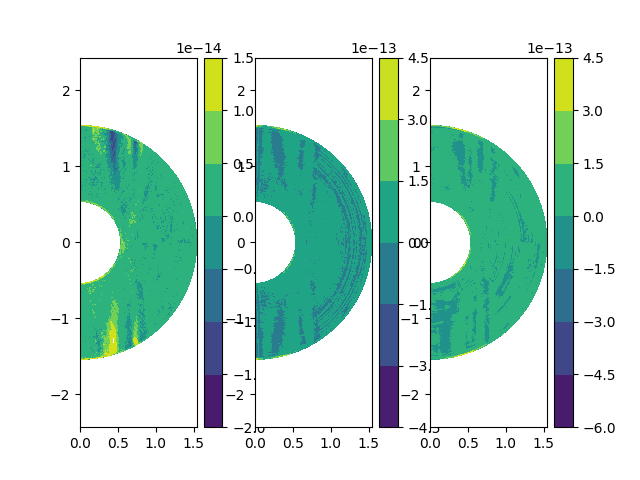

4.6395177691498214e-15 5.9846149249372815e-15 9.376755443494189e-15


In [17]:
# Benchmark for meridional slice
print(SpectralFieldMeridional['uR'][0].shape)
print(PhysicalFieldMeridional['uR'][0].shape)
print(np.linalg.norm(SpectralFieldMeridional['x'] - PhysicalFieldMeridional['x'][1:-1,:]))
print(np.linalg.norm(SpectralFieldMeridional['y'] - PhysicalFieldMeridional['y'][1:-1,:]))
%matplotlib notebook
plt.figure(6)
plt.subplot(131)
f1 = plt.contourf(SpectralFieldMeridional['x'], SpectralFieldMeridional['y'], \
                  (SpectralFieldMeridional['uR']-PhysicalFieldMeridional['uR'][:, 1:-1]).T)
err_ur = np.linalg.norm(SpectralFieldMeridional['uR']\
                        -PhysicalFieldMeridional['uR'][:, 1:-1])/np.linalg.norm(SpectralFieldMeridional['uR'])
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(SpectralFieldMeridional['x'], SpectralFieldMeridional['y'], \
                  (SpectralFieldMeridional['uTheta']-PhysicalFieldMeridional['uTheta'][:, 1:-1]).T)
err_utheta = np.linalg.norm(SpectralFieldMeridional['uTheta']\
                        -PhysicalFieldMeridional['uTheta'][:, 1:-1])/np.linalg.norm(SpectralFieldMeridional['uTheta'])
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(SpectralFieldMeridional['x'], SpectralFieldMeridional['y'], \
                  (SpectralFieldMeridional['uPhi']-PhysicalFieldMeridional['uPhi'][:, 1:-1]).T)
err_uphi = np.linalg.norm(SpectralFieldMeridional['uPhi']\
                        -PhysicalFieldMeridional['uPhi'][:, 1:-1])/np.linalg.norm(SpectralFieldMeridional['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}} 
\begin{equation}
   \mathbf{u} = rt
\end{equation}

(61,)
(61,)
2.8611673550166495e-14
4.114113563787884e-14


<IPython.core.display.Javascript object>


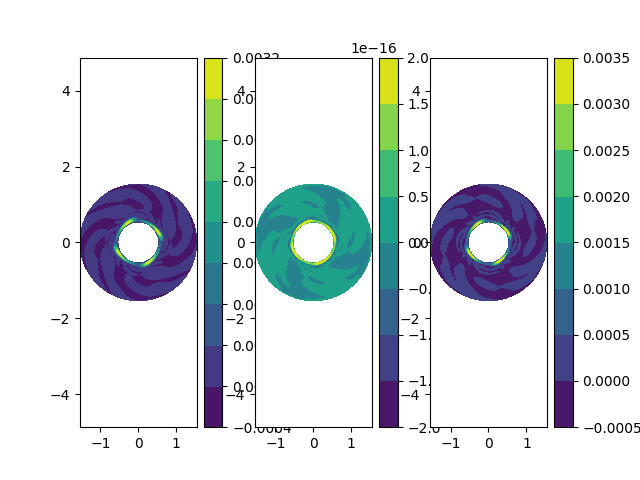

0.012967447107843623 0.24919944444146727 0.003349314273532583


In [20]:
# Benchmark for equatorial slice
print(SpectralFieldEquatorial['uR'][0].shape)
print(PhysicalFieldEquatorial['uR'][0].shape)
print(np.linalg.norm(SpectralFieldEquatorial['x'] - PhysicalFieldEquatorial['x']))
print(np.linalg.norm(SpectralFieldEquatorial['y'] - PhysicalFieldEquatorial['y']))
%matplotlib notebook
plt.figure(6)
plt.subplot(131)
f1 = plt.contourf(SpectralFieldEquatorial['x'], SpectralFieldEquatorial['y'], \
                  (SpectralFieldEquatorial['uR']-PhysicalFieldEquatorial['uR']).T)
err_ur = np.linalg.norm(SpectralFieldEquatorial['uR']\
                        -PhysicalFieldEquatorial['uR'])/np.linalg.norm(SpectralFieldEquatorial['uR'])
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(SpectralFieldEquatorial['x'], SpectralFieldEquatorial['y'], \
                  (SpectralFieldEquatorial['uTheta']-PhysicalFieldEquatorial['uTheta']).T)
err_utheta = np.linalg.norm(SpectralFieldEquatorial['uTheta']\
                        -PhysicalFieldEquatorial['uTheta'])/np.linalg.norm(SpectralFieldEquatorial['uTheta'])
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(SpectralFieldEquatorial['x'], SpectralFieldEquatorial['y'], \
                  (SpectralFieldEquatorial['uPhi']-PhysicalFieldEquatorial['uPhi']).T)
err_uphi = np.linalg.norm(SpectralFieldEquatorial['uPhi']\
                        -PhysicalFieldEquatorial['uPhi'])/np.linalg.norm(SpectralFieldEquatorial['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}}

(61,)
(61,)
1.3135581345475357e-13
5.333232229509147e-14


<IPython.core.display.Javascript object>


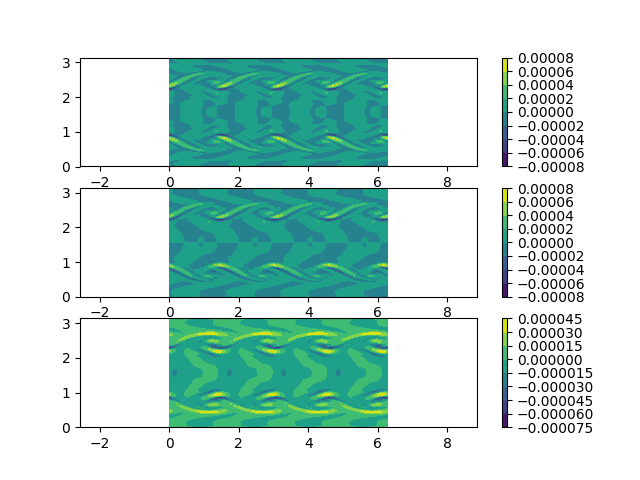

0.0008092587423267559 0.000610667026637951 0.00013497709424610129


In [26]:
# Benchmark Isoradius slice
print(SpectralFieldIsoradius['uR'][0].shape)
print(PhysicalFieldIsoradius['uR'][0].shape)
print(np.linalg.norm(SpectralFieldIsoradius['theta'] - PhysicalFieldIsoradius['theta'][:,1:-1]))
print(np.linalg.norm(SpectralFieldIsoradius['phi'] - PhysicalFieldIsoradius['phi'][:,1:-1]))
%matplotlib notebook
plt.figure(6)
plt.subplot(311)
f1 = plt.contourf(SpectralFieldIsoradius['phi'], SpectralFieldIsoradius['theta'], \
                  (SpectralFieldIsoradius['uR']-PhysicalFieldIsoradius['uR'][1:-1,:]).T)
err_ur = np.linalg.norm(SpectralFieldIsoradius['uR']-\
          PhysicalFieldIsoradius['uR'][1:-1,:]) /np.linalg.norm(SpectralFieldIsoradius['uR'])
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(312)
f2 = plt.contourf(SpectralFieldIsoradius['phi'], SpectralFieldIsoradius['theta'], \
                  (SpectralFieldIsoradius['uTheta']-PhysicalFieldIsoradius['uTheta'][1:-1,:]).T)
err_utheta = np.linalg.norm(SpectralFieldIsoradius['uTheta']-\
          PhysicalFieldIsoradius['uTheta'][1:-1,:]) /np.linalg.norm(SpectralFieldIsoradius['uTheta'])
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(313)
f3 = plt.contourf(SpectralFieldIsoradius['phi'], SpectralFieldIsoradius['theta'], \
                  (SpectralFieldIsoradius['uPhi']-PhysicalFieldIsoradius['uPhi'][1:-1,:]).T)

err_uphi = np.linalg.norm(SpectralFieldIsoradius['uPhi']-\
          PhysicalFieldIsoradius['uPhi'][1:-1,:]) /np.linalg.norm(SpectralFieldIsoradius['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}}

In [2]:
'f' in ['a', 'f', 'c']

True

In [22]:
chebval(0.,c2)

-4.168822000064649

In [3]:
print('blabla\
blalba')

blablablalba


In [ ]:
x = np.linspace(-1, 1, 100)

In [ ]:
chebyshev.chebval(x, c)

In [ ]:

plt.subplot(224)
streamplot(GeoFlowPhysical)
plt.axis('equal')